In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train_rgb = np.stack((x_train,) * 3, axis=-1)
x_test_rgb = np.stack((x_test,) * 3, axis=-1)

x_train_rgb = tf.image.resize(x_train_rgb, (32, 32)) / 255.0
x_test_rgb = tf.image.resize(x_test_rgb, (32, 32)) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

base_model.trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [5]:
datagenerator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
histoy = model.fit(datagenerator.flow(x_train_rgb.numpy().reshape((-1, 32, 32, 3)), y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=15,
          validation_data=(x_test_rgb.numpy().reshape((-1, 32, 32, 3)), y_test))

restored = np.array([tf.image.resize(image, (32, 32)).numpy() for image in x_test_rgb])
test_loss, test_acc = model.evaluate(restored, y_test)
print("Test accuracy:", test_acc)

Epoch 1/15


C:\Users\PC\Documents\GitHub\DS_HW_10\env\lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\PC\Documents\GitHub\DS_HW_10\env\lib\site-packages\keras\src\preprocessing\image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(




100/100 [==============================] - 50s 492ms/step - loss: 1.3476 - accuracy: 0.5333 - val_loss: 0.8874 - val_accuracy: 0.6953
Epoch 2/15
100/100 [==============================] - 51s 517ms/step - loss: 0.9203 - accuracy: 0.6597 - val_loss: 0.7964 - val_accuracy: 0.7116
Epoch 3/15
100/100 [==============================] - 52s 520ms/step - loss: 0.8299 - accuracy: 0.7095 - val_loss: 0.7100 - val_accuracy: 0.7417
Epoch 4/15
100/100 [==============================] - 52s 519ms/step - loss: 0.7989 - accuracy: 0.7166 - val_loss: 0.7055 - val_accuracy: 0.7465
Epoch 5/15
100/100 [==============================] - 52s 520ms/step - loss: 0.7504 - accuracy: 0.7308 - val_loss: 0.7021 - val_accuracy: 0.7427
Epoch 6/15
100/100 [==============================] - 53s 532ms/step - loss: 0.7472 - accuracy: 0.7272 - val_loss: 0.6880 - val_accuracy: 0.7471
Epoch 7/15
100/100 [==============================] - 57s 570ms/step - loss: 0.7422 - accuracy: 0.7341 - val_loss: 0.6353 - val_accuracy: 0

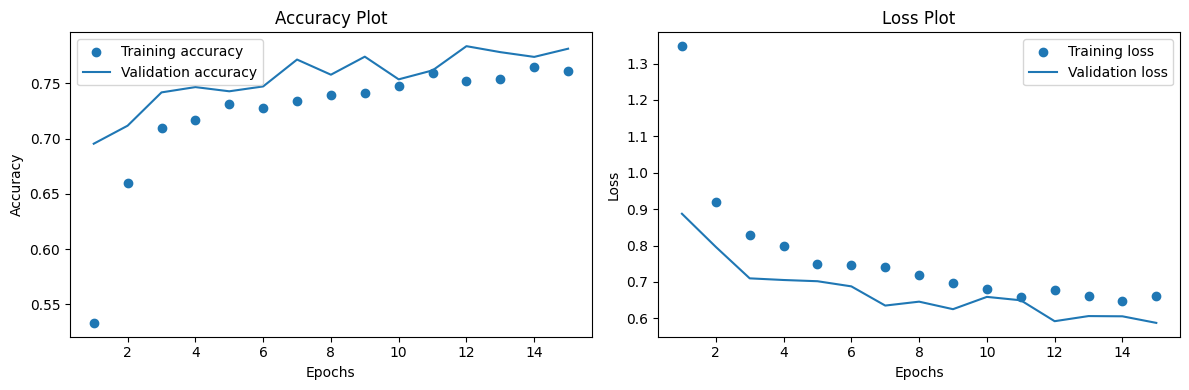

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(range(1, len(histoy.history['accuracy']) + 1), histoy.history['accuracy'], label='Training accuracy')
plt.plot(range(1, len(histoy.history['val_accuracy']) + 1), histoy.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(1, len(histoy.history['loss']) + 1), histoy.history['loss'], label='Training loss')
plt.plot(range(1, len(histoy.history['val_loss']) + 1), histoy.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend()

plt.tight_layout()
plt.show()